In [1]:
# Import the basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import os

import tensorflow as tf
from tensorflow import keras

In [2]:
# import the dataset
mydata = pd.read_excel('Win_Prediction_Data.xlsx')
mydata.head(10)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
5,Internal,Solution 32,2011-05-24,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
9,Internal,Solution 59,2011-11-17,Sector 20,Others,Sargar Deep Rao,Hardeep Suksma,558823.53,Lost


In [3]:
newdata = mydata.copy()
newdata.head(10)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
5,Internal,Solution 32,2011-05-24,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
6,Internal,Solution 59,2011-11-03,Sector 2,L10,Mervin Harwood,rahul sharma,526176.47,Won
7,Govt,Solution 7,2012-09-17,Sector 13,L5,Sargar Deep Rao,Vidur Hukle,409705.88,Lost
8,Consumer Good,Solution 42,2012-04-11,Sector 12,L10,Lilli Storrs,Md. Daud,1032352.94,Won
9,Internal,Solution 59,2011-11-17,Sector 20,Others,Sargar Deep Rao,Hardeep Suksma,558823.53,Lost


In [4]:
# missing data
newdata.isnull().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [5]:
(newdata.isnull().sum() / len(newdata))*100

Client Category     0.78521
Solution Type       0.00000
Deal Date           0.00000
Sector              0.00000
Location            0.00000
VP Name             0.00000
Manager Name        0.00000
Deal Cost           0.00000
Deal Status Code    0.00000
dtype: float64

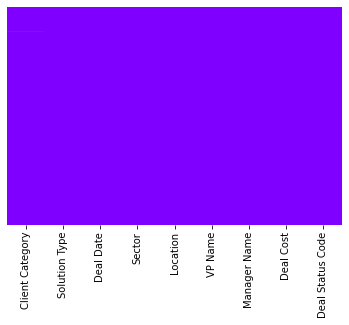

In [6]:
sns.heatmap(newdata.isnull(), yticklabels = False, cbar=False, cmap='rainbow')
plt.show()

In [7]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [8]:
# handling missing value
Client_Category = newdata['Client Category'].value_counts()

In [9]:
Client_Category

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [10]:
newdata['Client Category'] = newdata['Client Category'].fillna('Others')

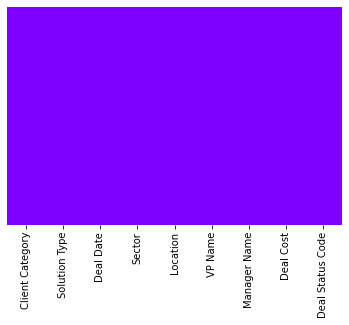

In [11]:
sns.heatmap(newdata.isnull(), yticklabels = False, cbar=False, cmap='rainbow')
plt.show()

In [12]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   10061 non-null  object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [13]:
# Describe the object data type 
sumcat = newdata.describe(include='O')
sumcat

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Status Code
count,10061,10061,10061,10061,10061,10061,10061
unique,41,67,25,13,43,278,2
top,Others,Solution 32,Sector 23,L10,Mervin Harwood,Molly Eakes,Lost
freq,1842,1439,2693,3360,1166,323,6306


In [14]:
newdata['Deal Status Code'].value_counts()

Lost    6306
Won     3755
Name: Deal Status Code, dtype: int64

In [15]:
Client_Category_index = newdata['Client Category'].value_counts().index

In [16]:
Client_Category_index

Index(['Others', 'Internal', 'Services_based', 'Tech', 'Domestic Public Bank',
       'International Bank', 'Consulting', 'Finance', 'Telecom', 'Power ind',
       'Domestic Private Bank', 'Insurance', 'Consumer Good', 'Automobiles',
       'Infrastructure', 'Domestic Bank', 'Retail_market', 'Govt',
       'Hospitality', 'Manufacturing', 'Pharma', 'Healthcare', 'Electronics',
       'Media_Journal', 'Industries', 'Research Development', 'Energy',
       'Knowledge', 'Management', 'Govt Bank Special', 'Payment', 'Energy ',
       'e-commerce', 'Airpline', 'Holding', 'International Org', 'Logistics',
       'Real Estate', 'Share_market', 'Tax_audit', 'Medical '],
      dtype='object')

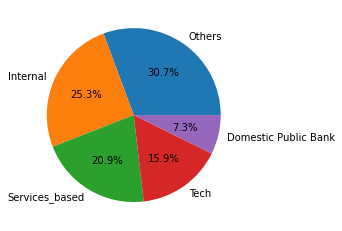

In [17]:
plt.pie(Client_Category[:5], labels=Client_Category_index[:5], autopct = '%1.1f%%')
plt.show()

<AxesSubplot:>

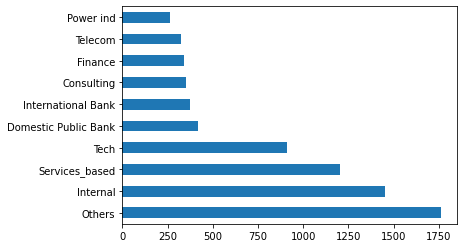

In [18]:
Client_Category[:10].plot(kind='barh')

In [19]:
VP_Name_index = newdata['VP Name'].value_counts().index

In [20]:
VP_Name_index

Index(['Mervin Harwood', 'Ankita Aggarwal', 'Sargar Deep Rao',
       'Long Bergstrom', 'Mangesh K. Singh', 'Rosanna Maynez', 'Ekta Zutshi',
       'Rahul Bajpai', 'neeraj kumar', 'Son Mcconnaughy', 'som dutt',
       'Hardeep Suksma', 'Brendon Wycoff', 'Clinton Mani', 'Saurabh Singh',
       'Jewell Tunstall', 'Rudraksh Sharma', 'Gopa Trilochana',
       'Russell Dahlen', 'Molly Eakes', 'Alam Syed', 'Gaurav Sameria',
       'Varsha Arora', 'Gayle Molter', 'Vidur Hukle', 'Earline Langton',
       'Manpreet Singh', 'Mayank Mewar', 'Marcella Mo', 'Rahul Kocher',
       'Man Suddeth', 'Jitendra Choudhary', 'Prashant Rawat', 'Lilli Storrs',
       'Vikram Rawat', 'Kamelesh Srinivasan', 'Dennis Faux', 'Visvajeet Das',
       'Waylon Mulder', 'P. Somya', 'Kirk Hofmeister', 'Sarthak Batra',
       'md. afsar'],
      dtype='object')

In [21]:
VP_Name = newdata['VP Name'].value_counts()
VP_Name

Mervin Harwood         1166
Ankita Aggarwal        1143
Sargar Deep Rao         956
Long Bergstrom          921
Mangesh K. Singh        812
Rosanna Maynez          662
Ekta Zutshi             550
Rahul Bajpai            523
neeraj kumar            471
Son Mcconnaughy         232
som dutt                220
Hardeep Suksma          208
Brendon Wycoff          189
Clinton Mani            184
Saurabh Singh           176
Jewell Tunstall         156
Rudraksh Sharma         147
Gopa Trilochana         136
Russell Dahlen          133
Molly Eakes             126
Alam Syed               126
Gaurav Sameria          114
Varsha Arora            104
Gayle Molter            104
Vidur Hukle             100
Earline Langton          82
Manpreet Singh           46
Mayank Mewar             41
Marcella Mo              32
Rahul Kocher             32
Man Suddeth              29
Jitendra Choudhary       28
Prashant Rawat           27
Lilli Storrs             26
Vikram Rawat             17
Kamelesh Srinivasan 

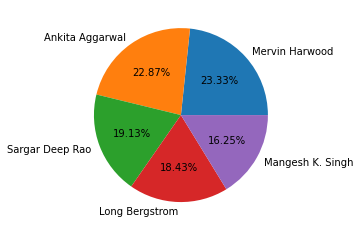

In [22]:
plt.pie(VP_Name[:5], labels=VP_Name_index[:5], autopct = '%1.2f%%')
plt.show()

In [23]:
Manager_Name = newdata['Manager Name'].value_counts()
Manager_Name

Molly Eakes        323
Rudraksh Sharma    270
Desmond Krout      230
Gayle Molter       186
Manpreet Singh     181
                  ... 
Anju Nanda           1
Taran Singh          1
pooran chand         1
Rishab Bhatt         1
Cleotilde Biron      1
Name: Manager Name, Length: 278, dtype: int64

In [24]:
Manager_Name_index = newdata['Manager Name'].value_counts().index
Manager_Name_index

Index(['Molly Eakes', 'Rudraksh Sharma', 'Desmond Krout', 'Gayle Molter',
       'Manpreet Singh', 'Rosana Yokum', 'Rayford Durgan', 'Manish Saundriyal',
       'Jewell Tunstall', 'Hardeep Suksma',
       ...
       'Palmer Holmberg', 'Heath Mullarkey', 'Sultan Khan', 'Aastha Gandhi',
       'Anish Jonson', 'Anju Nanda', 'Taran Singh', 'pooran chand',
       'Rishab Bhatt', 'Cleotilde Biron'],
      dtype='object', length=278)

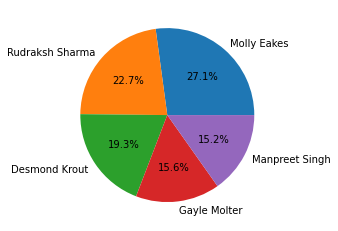

In [25]:
plt.pie(Manager_Name[:5], labels = Manager_Name_index[:5], autopct = '%1.1f%%')
plt.show()

<AxesSubplot:>

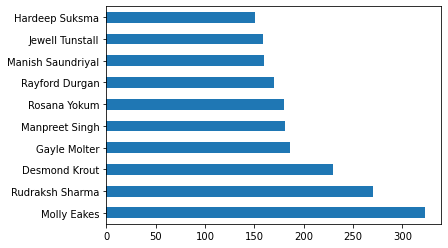

In [26]:
Manager_Name[:10].plot(kind = 'barh')

In [27]:
newdata.head(3)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost


In [28]:
Solution_Type = newdata['Solution Type'].value_counts()
Solution_Type

Solution 32    1439
Solution 9     1418
Solution 10    1016
Solution 39     585
Solution 67     584
               ... 
Solution 60       1
Solution 57       1
Solution 56       1
Solution 18       1
Solution 19       1
Name: Solution Type, Length: 67, dtype: int64

In [29]:
Solution_Type_index = newdata['Solution Type'].value_counts().index
Solution_Type_index

Index(['Solution 32', 'Solution 9', 'Solution 10', 'Solution 39',
       'Solution 67', 'Solution 37', 'Solution 59', 'Solution 12',
       'Solution 8', 'Solution 29', 'Solution 6', 'Solution 13', 'Solution 31',
       'Solution 4', 'Solution 28', 'Solution 38', 'Solution 7', 'Solution 11',
       'Solution 20', 'Solution 52', 'Solution 40', 'Solution 30',
       'Solution 14', 'Solution 36', 'Solution 58', 'Solution 47',
       'Solution 35', 'Solution 55', 'Solution 33', 'Solution 48',
       'Solution 16', 'Solution 26', 'Solution 49', 'Solution 2',
       'Solution 34', 'Solution 42', 'Solution 61', 'Solution 41',
       'Solution 65', 'Solution 44', 'Solution 17', 'Solution 15',
       'Solution 50', 'Solution 25', 'Solution 1', 'Solution 43',
       'Solution 24', 'Solution 62', 'Solution 5', 'Solution 27',
       'Solution 46', 'Solution 3', 'Solution 22', 'Solution 53',
       'Solution 51', 'Solution 45', 'Solution 63', 'Solution 23',
       'Solution 54', 'Solution 21', 'Sol

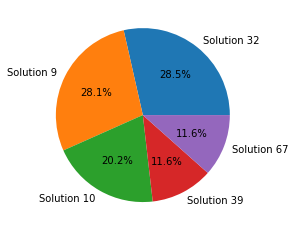

In [30]:
plt.pie(Solution_Type[:5], labels = Solution_Type_index[:5], autopct = '%1.1f%%')
plt.show()

In [31]:
Sector_cat = newdata['Sector'].value_counts()
Sector_cat

Sector 23    2693
Sector 2     1748
Sector 20     773
Sector 12     607
Sector 24     578
Sector 17     474
Sector 16     474
Sector 15     387
Sector 9      369
Sector 25     273
Sector 18     251
Sector 1      231
Sector 13     185
Sector 22     144
Sector 19     142
Sector 3      135
Sector 4      128
Sector 11     114
Sector 14     109
Sector 6       96
Sector 5       64
Sector 8       39
Sector 21      30
Sector 7       14
Sector 10       3
Name: Sector, dtype: int64

In [32]:
Sector_index = newdata['Sector'].value_counts().index
Sector_index

Index(['Sector 23', 'Sector 2', 'Sector 20', 'Sector 12', 'Sector 24',
       'Sector 17', 'Sector 16', 'Sector 15', 'Sector 9', 'Sector 25',
       'Sector 18', 'Sector 1', 'Sector 13', 'Sector 22', 'Sector 19',
       'Sector 3', 'Sector 4', 'Sector 11', 'Sector 14', 'Sector 6',
       'Sector 5', 'Sector 8', 'Sector 21', 'Sector 7', 'Sector 10'],
      dtype='object')

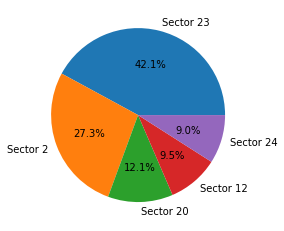

In [33]:
plt.pie(Sector_cat[:5], labels = Sector_index[:5], autopct = '%1.1f%%')
plt.show()

In [34]:
Location_cat = newdata['Location'].value_counts()
Location_cat

L10       3360
L5        2328
L1        1572
Others     817
L3         556
L11        367
L12        276
L9         240
L7         238
L4         188
L6         100
L8          11
L2           8
Name: Location, dtype: int64

In [35]:
Location_index = newdata['Location'].value_counts().index
Location_index

Index(['L10', 'L5', 'L1', 'Others', 'L3', 'L11', 'L12', 'L9', 'L7', 'L4', 'L6',
       'L8', 'L2'],
      dtype='object')

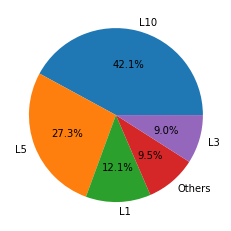

In [36]:
plt.pie(Sector_cat[:5], labels = Location_index[:5], autopct = '%1.1f%%')
plt.show()

In [37]:
# We have to check the relationship between independent variable vs Dependent variables

In [38]:
newdata.head(2)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won


In [39]:
newdata.columns

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code'],
      dtype='object')

In [40]:
newdata.head(2)

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won


In [41]:
rel_client_cat = newdata[['Client Category',
                     'Deal Status Code']].groupby(['Client Category',
                                                   'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status'})

In [42]:
rel_client_cat

,Client Category,Deal Status Code,Deal Status
0,Airpline,Lost,22
1,Airpline,Won,5
2,Automobiles,Lost,112
3,Automobiles,Won,66
4,Consulting,Lost,182
...,...,...,...
77,Tech,Won,313
78,Telecom,Lost,192
79,Telecom,Won,135
80,e-commerce,Lost,20


In [43]:
Solution_Type_cat = newdata[['Solution Type',
                     'Deal Status Code']].groupby(['Solution Type',
                                                   'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status'})

In [44]:
Solution_Type_cat

,Solution Type,Deal Status Code,Deal Status
0,Solution 1,Lost,2
1,Solution 1,Won,3
2,Solution 10,Lost,690
3,Solution 10,Won,326
4,Solution 11,Lost,88
...,...,...,...
111,Solution 7,Won,62
112,Solution 8,Lost,190
113,Solution 8,Won,184
114,Solution 9,Lost,1018


In [45]:
Solution_Type_cat[['Solution Type']].groupby(['Solution Type']).size()

Solution Type
Solution 1     2
Solution 10    2
Solution 11    2
Solution 12    2
Solution 13    2
              ..
Solution 66    1
Solution 67    2
Solution 7     2
Solution 8     2
Solution 9     2
Length: 67, dtype: int64

In [46]:
VP_Name_cat = newdata[['VP Name',
                     'Deal Status Code']].groupby(['VP Name',
                                                   'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status'})

In [47]:
VP_Name_cat.head(3)

,VP Name,Deal Status Code,Deal Status
0,Alam Syed,Lost,62
1,Alam Syed,Won,64
2,Ankita Aggarwal,Lost,866


In [48]:
VP_Name_cat[['VP Name',
                     'Deal Status']].groupby(['VP Name',
                                                   'Deal Status']).size().reset_index()

,VP Name,Deal Status,0
0,Alam Syed,62,1
1,Alam Syed,64,1
2,Ankita Aggarwal,277,1
3,Ankita Aggarwal,866,1
4,Brendon Wycoff,57,1
...,...,...,...
77,md. afsar,2,1
78,neeraj kumar,217,1
79,neeraj kumar,254,1
80,som dutt,82,1


In [49]:
Manager_Name_cat = newdata[['Manager Name',
                     'Deal Status Code']].groupby(['Manager Name',
                                                   'Deal Status Code']).size().reset_index().rename(columns={0:'Total count'})

In [50]:
Manager_Name_cat

,Manager Name,Deal Status Code,Total count
0,Aastha Gandhi,Won,1
1,Abhinav Warrier,Lost,80
2,Abhinav Warrier,Won,15
3,Abhishek Singhal,Lost,44
4,Abhishek Singhal,Won,23
...,...,...,...
470,sunder paal,Won,6
471,vansu dev,Lost,78
472,vansu dev,Won,54
473,vinit katariya,Lost,14


In [51]:
newdata.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [52]:
(pd.pivot_table(newdata, index = 'Deal Status Code', columns = 'Manager Name', values ='Deal Cost'))

Manager Name,Aastha Gandhi,Abhinav Warrier,Abhishek Singhal,Abhiskek Kumar,Abhiskhek D,Abram Fines,Aditya Kumar,Aditya Tondon,Ahdarsha Jha,Ahswini Saini,...,shafibul,sharat chandran,sheak shakir,shiv kumar,shiv shakti singh,shyam kumar,som dutt,sunder paal,vansu dev,vinit katariya
Deal Status Code,,,,,,,,,,,,,,,,,,,,,
Lost,NaN,588808.824000,772860.963182,949894.957857,440767.973889,501764.706000,792647.06,1058823.53,924866.311818,1029411.77,...,2.867647e+06,441176.470,882352.940000,219019.61,1470588.24,715250.000000,NaN,882352.940,9.687406e+05,1.098739e+06
Won,242647.06,302235.296667,476956.522609,587507.740789,375658.823600,714127.789655,250367.65,NaN,351102.940000,601470.59,...,NaN,989411.765,461127.451667,NaN,NaN,307769.608333,198627.45,371960.785,1.253295e+06,3.917206e+06


In [53]:
pd.pivot_table(newdata, index = 'Deal Status Code', columns = 'VP Name', values ='Deal Cost')

VP Name,Alam Syed,Ankita Aggarwal,Brendon Wycoff,Clinton Mani,Dennis Faux,Earline Langton,Ekta Zutshi,Gaurav Sameria,Gayle Molter,Gopa Trilochana,...,Saurabh Singh,Son Mcconnaughy,Varsha Arora,Vidur Hukle,Vikram Rawat,Visvajeet Das,Waylon Mulder,md. afsar,neeraj kumar,som dutt
Deal Status Code,,,,,,,,,,,,,,,,,,,,,
Lost,1.087144e+06,654206.63000,1.096894e+06,776755.218548,554656.861667,1.189219e+06,7.912821e+05,554590.017879,7.291971e+05,1.464321e+06,...,761066.176429,1.517227e+06,7.272255e+05,615517.241724,1.681103e+06,1176470.59,235294.12,3235294.12,478943.956142,554650.469710
Won,1.172937e+06,503528.35065,1.909288e+06,600857.843500,315294.120000,6.034314e+05,1.021396e+06,586433.823958,1.282863e+06,8.195701e+05,...,962863.052187,5.470632e+05,3.454505e+06,540581.233095,5.161111e+05,5588235.29,88235.29,NaN,693700.190092,562977.044756


In [54]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   10061 non-null  object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [55]:
import datetime
newdata['Deal_Date_year'] = newdata['Deal Date'].dt.year

In [56]:
newdata.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011


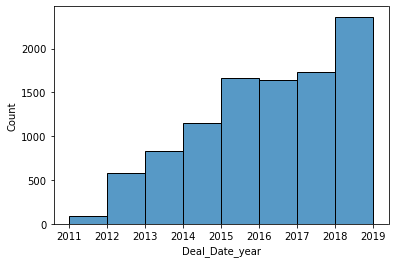

In [57]:
sns.histplot(newdata.Deal_Date_year, bins = 8)
plt.show()

In [58]:
newdata['Deal_Date_month'] = newdata['Deal Date'].dt.month

In [59]:
newdata.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6


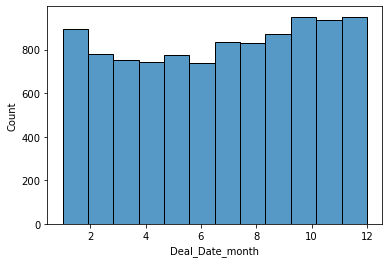

In [60]:
sns.histplot(newdata.Deal_Date_month, bins = 12)
plt.show()

In [61]:
newdata['Deal_Date_quarter'] = newdata['Deal Date'].dt.quarter

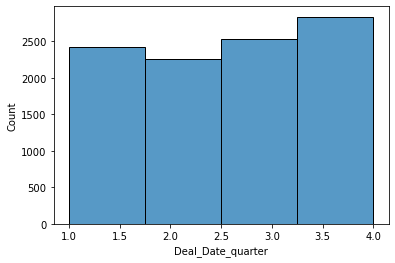

In [62]:
sns.histplot(newdata.Deal_Date_quarter, bins = 4)
plt.show()

<AxesSubplot:>

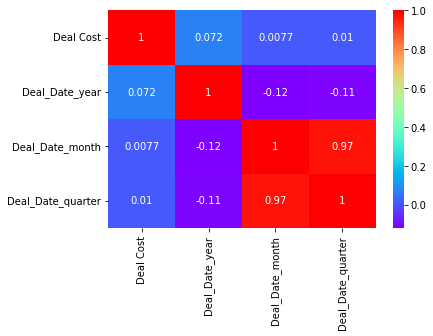

In [63]:
sns.heatmap(newdata.corr(), annot=True, cmap='rainbow')

In [64]:
newdata.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month,Deal_Date_quarter
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3,1
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9,3
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8,3
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4,2
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6,2


In [65]:
newdata['Client Category'].value_counts()

Others                   1842
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [66]:
newdata.columns

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code',
       'Deal_Date_year', 'Deal_Date_month', 'Deal_Date_quarter'],
      dtype='object')

In [67]:
newdata = newdata.drop(['Deal Date'], axis=1)

In [68]:
newdata['Client Category'] = newdata['Client Category'].astype('category')
newdata['Client Category'] = newdata['Client Category'].cat.codes

newdata['Solution Type'] = newdata['Solution Type'].astype('category')
newdata['Solution Type'] = newdata['Solution Type'].cat.codes

newdata['Sector'] = newdata['Sector'].astype('category')
newdata['Sector'] = newdata['Sector'].cat.codes

newdata['Location'] = newdata['Location'].astype('category')
newdata['Location'] = newdata['Location'].cat.codes

newdata['VP Name'] = newdata['VP Name'].astype('category')
newdata['VP Name'] = newdata['VP Name'].cat.codes

newdata['Manager Name'] = newdata['Manager Name'].astype('category')
newdata['Manager Name'] = newdata['Manager Name'].cat.codes

newdata['Deal Status Code'] = newdata['Deal Status Code'].astype('category')
newdata['Deal Status Code'] = newdata['Deal Status Code'].cat.codes

In [69]:
newdata.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month,Deal_Date_quarter
0,39,64,16,7,6,82,150000.00,1,2012,3,1
1,39,64,16,7,6,82,744705.88,1,2012,9,3
2,19,54,12,12,6,183,60000.00,0,2011,8,3
3,19,54,12,12,6,183,60000.00,0,2011,4,2
4,19,25,12,12,6,183,80882.35,0,2011,6,2


In [70]:
newdata = newdata.iloc[:,0:8]

In [71]:
newdata.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,39,64,16,7,6,82,150000.00,1
1,39,64,16,7,6,82,744705.88,1
2,19,54,12,12,6,183,60000.00,0
3,19,54,12,12,6,183,60000.00,0
4,19,25,12,12,6,183,80882.35,0


In [72]:
# split the data into x and y
x = newdata.iloc[:,0:-1].values
y = newdata['Deal Status Code'].values

In [73]:
x

array([[3.90000000e+01, 6.40000000e+01, 1.60000000e+01, ...,
        6.00000000e+00, 8.20000000e+01, 1.50000000e+05],
       [3.90000000e+01, 6.40000000e+01, 1.60000000e+01, ...,
        6.00000000e+00, 8.20000000e+01, 7.44705880e+05],
       [1.90000000e+01, 5.40000000e+01, 1.20000000e+01, ...,
        6.00000000e+00, 1.83000000e+02, 6.00000000e+04],
       ...,
       [3.10000000e+01, 6.60000000e+01, 2.40000000e+01, ...,
        2.90000000e+01, 1.82000000e+02, 5.88235290e+05],
       [3.10000000e+01, 5.80000000e+01, 2.40000000e+01, ...,
        1.90000000e+01, 5.00000000e+01, 3.04205882e+06],
       [2.80000000e+01, 6.60000000e+01, 3.00000000e+00, ...,
        3.40000000e+01, 2.16000000e+02, 1.47058820e+05]])

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(x)

In [75]:
x1

array([[ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.38084443],
       [ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.01369972],
       [-0.33339304,  0.86106354,  0.01663725, ..., -1.11119992,
         0.60004268, -0.43640639],
       ...,
       [ 0.70843971,  1.38496843,  2.32277814, ...,  0.79154462,
         0.58701806, -0.11029764],
       [ 0.70843971,  1.0356985 ,  2.32277814, ..., -0.03573561,
        -1.13223202,  1.40458284],
       [ 0.44798152,  1.38496843, -1.71296842, ...,  1.20518474,
         1.0298552 , -0.38266018]])

In [76]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, train_size=0.70, random_state=101)

# Model Building :

# 1. Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit = logit.fit(x_train,y_train)

In [78]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [79]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

In [80]:
print(accuracy_score(y_train, y_pred_train))
print ('*'*75)
print (accuracy_score(y_test, y_pred_test))

0.6181482533371201
***************************************************************************
0.6472341835044717


In [81]:
print(classification_report(y_train, y_pred_train))
print ('*'*70)
print (classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76      4351
           1       0.56      0.00      0.01      2691

    accuracy                           0.62      7042
   macro avg       0.59      0.50      0.39      7042
weighted avg       0.60      0.62      0.47      7042

**********************************************************************
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1955
           1       0.40      0.00      0.00      1064

    accuracy                           0.65      3019
   macro avg       0.52      0.50      0.39      3019
weighted avg       0.56      0.65      0.51      3019



In [82]:
print(confusion_matrix(y_train, y_pred_train))
print ('*'*75)
print (confusion_matrix(y_test, y_pred_test))

[[4344    7]
 [2682    9]]
***************************************************************************
[[1952    3]
 [1062    2]]


# 2. Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [84]:
y_pred_dt_train = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

In [85]:
print(accuracy_score(y_train, y_pred_dt_train))
print ('*'*75)
print (accuracy_score(y_test, y_pred_dt_test))

0.9967338824197671
***************************************************************************
0.7913216296787016


In [86]:
print(confusion_matrix(y_train, y_pred_dt_train))
print ('*'*75)
print (confusion_matrix(y_test, y_pred_dt_test))

[[4350    1]
 [  22 2669]]
***************************************************************************
[[1736  219]
 [ 411  653]]


In [87]:
print(classification_report(y_train, y_pred_dt_train))
print ('*'*70)
print (classification_report(y_test, y_pred_dt_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4351
           1       1.00      0.99      1.00      2691

    accuracy                           1.00      7042
   macro avg       1.00      1.00      1.00      7042
weighted avg       1.00      1.00      1.00      7042

**********************************************************************
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1955
           1       0.75      0.61      0.67      1064

    accuracy                           0.79      3019
   macro avg       0.78      0.75      0.76      3019
weighted avg       0.79      0.79      0.79      3019



# 3. Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500, criterion='entropy')
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [89]:
y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test = rfc.predict(x_test)

In [90]:
print(accuracy_score(y_train, y_pred_rfc_train))
print ('*'*75)
print (accuracy_score(y_test, y_pred_rfc_test))

0.9967338824197671
***************************************************************************
0.8211328254388871


In [91]:
print(confusion_matrix(y_train, y_pred_rfc_train))
print ('*'*75)
print (confusion_matrix(y_test, y_pred_rfc_test))

[[4343    8]
 [  15 2676]]
***************************************************************************
[[1825  130]
 [ 410  654]]


In [92]:
print(classification_report(y_train, y_pred_rfc_train))
print ('*'*70)
print (classification_report(y_test, y_pred_rfc_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4351
           1       1.00      0.99      1.00      2691

    accuracy                           1.00      7042
   macro avg       1.00      1.00      1.00      7042
weighted avg       1.00      1.00      1.00      7042

**********************************************************************
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1955
           1       0.83      0.61      0.71      1064

    accuracy                           0.82      3019
   macro avg       0.83      0.77      0.79      3019
weighted avg       0.82      0.82      0.81      3019



# 4. XGBoost

In [93]:
#conda install xgboost

In [105]:
import xgboost


In [113]:
conda install -c anaconda py-xgboost

^C

Note: you may need to restart the kernel to use updated packages.


In [112]:
from xgboost import XGBClassifier

ImportError: cannot import name 'XGBClassifier' from 'xgboost' (unknown location)

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



PackagesNotFoundError: The following packages are not available from current channels:

  - xgboost=0.6a2

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




# Stacking Classfier

In [95]:
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [111]:
clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = GaussianNB()
clf3 = RandomForestClassifier()
clf4 = XGBClassifier()
clf5 = LogisticRegression()
sclf = StackingClassifier(classifiers = [clf1,clf2,clf3,clf4], meta_classifier=clf5)

print('3-fold cross validation : \n')

for clf,label in zip([clf1,clf2,clf3,clf4,sclf], ['KNN', 'Naive Bayes', 'Random Forest', 'XGBoost', 'Stacking Classfier']):
    scores = cross_val_score(clf, x, y, cv= 3, scoring = 'accuracy')
    print ('Accuracy : %0.2f (+/-%0.2f)[%s]' % (scores.mean(), scores.std(), label))


NameError: name 'XGBClassifier' is not defined

# Deep Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Architecture - Sequential / Functional

dnn = tf.keras.models.Sequential()
dnn.add(tf.keras.layers.Dense(units=20, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=20, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=20, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=20, activation='relu'))
dnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
dnn.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
dnn.fit(x_train, y_train, batch_size=32, epochs=100)

In [ ]:
dnn.fit(x_train, y_train, batch_size=32, epochs=25)

In [ ]:
y_pred = dnn.predict(x_test)
y_pred = (y_pred>0.5)
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(accuracy_score(y_test, y_pred))